# House Price Prediction

In [1]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

### Generate data

1. Generate housing data of sizes between 1000 and 3500 sq. ft.

In [2]:
num_houses = 160
np.random.seed(42)
house_size = np.random.randint(low=1000, high=3500, size=num_houses)

2. Generate house prices from house size with a random noise added.

In [3]:
np.random.seed(42)
house_price = house_size * 100.0 + np.random.randint(low=20000, high=70000, size=num_houses)

3. Visualize the house and price data

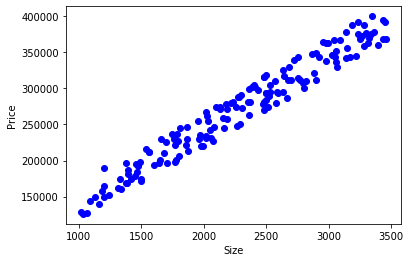

In [4]:
plt.plot(house_size, house_price, "bo")
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

### Prepare training/testing data sets

4. Create function to normalize data values using standard normal distribution
5. Define number of training/testing samples, 70/30 split

In [5]:
def normalize(array):
    return (array - array.mean()) / array.std()

In [6]:
num_train_samples = math.floor(num_houses * 0.7)

# Training set
train_house_size = np.asarray(house_size[:num_train_samples])
train_house_price = np.asarray(house_price[:num_train_samples])

train_house_size_norm = normalize(train_house_size)
train_house_price_norm = normalize(train_house_price)

# Testing set
test_house_size = np.asarray(house_size[num_train_samples:])
test_house_price = np.asarray(house_price[num_train_samples:])

test_house_size_norm = normalize(test_house_price)
test_house_price_norm = normalize(test_house_price)

### Setup Tensorflow environment

6. Create Tensorflow placeholders that get updated as we descend through gradient descent

In [7]:
tf_house_size = tf.placeholder("float", name="house_size")
tf_house_price = tf.placeholder("float", name="price")

7. Define variables holding the size factor and price offset we set during training

In [8]:
tf_size_factor = tf.Variable(np.random.randn(), name="size_factor")
tf_price_offset = tf.Variable(np.random.randn(), name="price_offset")

8. Define the inference and loss functions for the predicting values - predicted price = (size_factor * house_size) + price_offset

In [9]:
tf_price_pred = tf.add(tf.multiply(tf_size_factor, tf_house_size), tf_price_offset)
tf_cost = tf.reduce_sum(tf.pow(tf_price_pred - tf_house_price, 2)) / (2 * num_train_samples)

9. Define learning rate and optimizer

In [10]:
learning_rate = 0.1
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

W0729 15:41:36.198530  5676 deprecation.py:323] From c:\users\206568245\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Run the model and visualize output

10. Initialize the variables and launch the graph in the session

Iteration #: 0002 cost= 0.720058978 size_factor= 0.091779955 price_offset= -0.78197587
Iteration #: 0004 cost= 0.488989949 size_factor= 0.2530591 price_offset= -0.6400547
Iteration #: 0006 cost= 0.334198922 size_factor= 0.38506955 price_offset= -0.52387947
Iteration #: 0008 cost= 0.230510592 size_factor= 0.4931228 price_offset= -0.42877954
Iteration #: 0010 cost= 0.161057353 size_factor= 0.5815667 price_offset= -0.350931
Iteration #: 0012 cost= 0.114538930 size_factor= 0.65396035 price_offset= -0.2872049
Iteration #: 0014 cost= 0.083384469 size_factor= 0.713216 price_offset= -0.23503916
Iteration #: 0016 cost= 0.062521778 size_factor= 0.76171756 price_offset= -0.19233663
Iteration #: 0018 cost= 0.048552584 size_factor= 0.8014175 price_offset= -0.1573807
Iteration #: 0020 cost= 0.039200630 size_factor= 0.8339127 price_offset= -0.1287661
Iteration #: 0022 cost= 0.032940891 size_factor= 0.86051065 price_offset= -0.10534229
Iteration #: 0024 cost= 0.028751854 size_factor= 0.882282 price_of

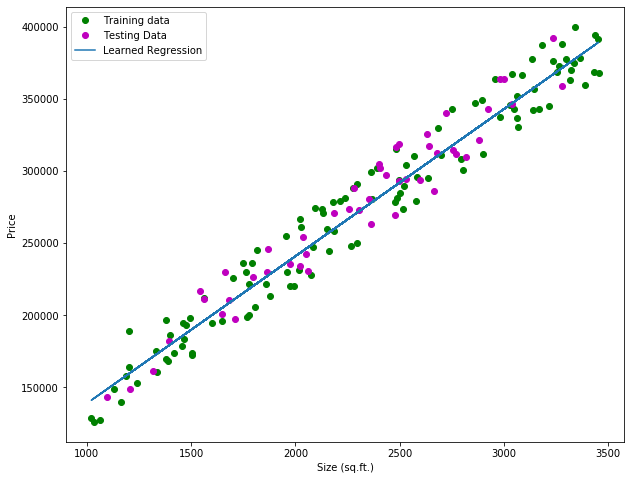

NameError: name 'fit_plot_idx' is not defined

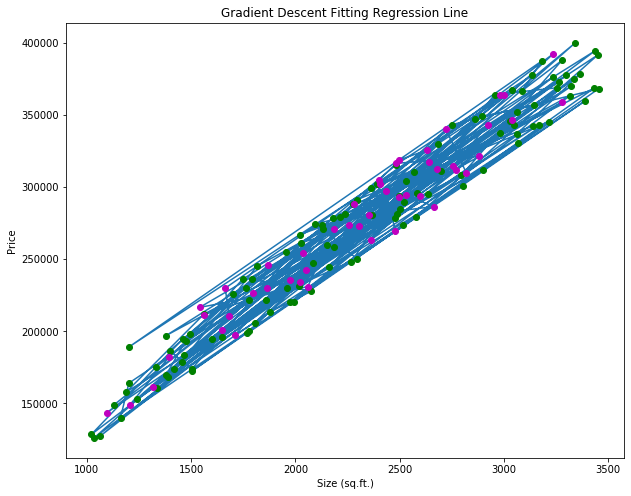

In [12]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    # set how often to display training progress and number of training iterations
    display_every = 2
    num_training_iter = 50
    
    # Iterate through training data
    for iteration in range(num_training_iter):
        
        # Fit training data
        for(x,y) in zip(train_house_size_norm, train_house_price_norm):
            sess.run(optimizer, feed_dict={tf_house_size: x, tf_house_price: y})
            
        # Display current status
        if((iteration + 1) % display_every == 0 ):
            c = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_house_price: train_house_price_norm})
            print("Iteration #:", '%04d' % (iteration + 1), "cost=", "{:.9f}".format(c), \
                  "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset))
    print("Optimization Finished!")
    training_cost = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_house_price: train_house_price_norm})
    print("Trained cost=", training_cost, "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset), '\n')
    
    # Denormalize values to original scale
    train_house_size_mean = train_house_size.mean()
    train_house_size_std = train_house_size.std()

    train_house_price_mean = train_house_price.mean()
    train_house_price_std = train_house_price.std()

    # Plot the graph
    plt.rcParams["figure.figsize"] = (10,8)
    plt.figure()
    plt.ylabel("Price")
    plt.xlabel("Size (sq.ft.)")
    plt.plot(train_house_size, train_house_price, 'go', label="Training data")
    plt.plot(test_house_size, test_house_price, 'mo', label="Testing Data")
    plt.plot(train_house_size_norm * train_house_size_std + train_house_size_mean, (sess.run(tf_size_factor) * train_house_size_norm + sess.run(tf_price_offset)) * train_house_price_std + train_house_price_mean, label="Learned Regression")
    plt.legend(loc="upper left")
    plt.show()
    
    # Gradient descent animation
    fig, ax = plt.subplots()
    line, = ax.plot(house_size, house_price)
    
    plt.rcParams["figure.figsize"] = (10,8)
    plt.title("Gradient Descent Fitting Regression Line")
    plt.ylabel("Price")
    plt.xlabel("Size (sq.ft.)")
    plt.plot(train_house_size, train_house_price, 'go', label="Training Data")
    plt.plot(test_house_size, test_house_price, 'mo', label="Testing Data")
    
    def animate(i):
        line.set_xdata(traing_house_size_norm * train_house-size_std + train_house-size_mean)
        line.set_ydata((fit_size_factor[i] * train_house_size_norm * fit_price_offsets[i]) * train_price_std + train_house_price_mean)
        return line,
    
    # Init only required for blitting to give a clean slate.
    def initAnim():
        line.set_ydata(np.zeros(shape=house_price.shape[0]))
        return line,
    
    ani = animation.FuncAnimation(fig, animate, frames=np.arange(0, fit_plot_idx), init_func=initAnim, interval=1000, blit=True)
    
    plt.show()